In [1]:
import pandas as pd

from Driver.driver import compute_alpha_with_markov_strat_for_ticker, retrieve_and_add_markov, compute_alpha_with_markov_strat_for_list_tickers, retrieve_data_and_add_features, assign_states_and_calculate_transition_probabilities
from Scrapers.yf_scraper import YFScraper
from Markov_State_Determiners.Czech_State_Determiner import CzechStateDeterminer
from Transition_Probability_Calculation.Empirical_Calculator import EmpiricalCalculator
from Transition_Probability_Calculation.Contour_Empirical_Calculator import ContourEmpiricalCalculator
from Basic_Feature_Selection.feature_addition import add_basic_technical_analysis_vars
from Markov_Strategies.Czech_State_Determiner.Czech_Strategy1 import CzechStrategy1
"""
REPORT INDICES:
Avg Alpha
Adj Alpha
M_P
BH_P
Ind Removed
Avg. Markov_R/MU_T
Percentile (Against Random)
Avg. BuyHold_R/MU_T
M/BH DTs
markov_dts
buy_hold_dts
Random Mean
Random Standard Deviation
macro_t_units


For the analytics, the indices are listed as follows:
State Combo
Avg Return %
Profitable %
Over B %
STD
Num Instances
Returns
"""

'\nREPORT INDICES:\nAvg Alpha\nAdj Alpha\nM_P\nBH_P\nInd Removed\nAvg. Markov_R/MU_T\nPercentile (Against Random)\nAvg. BuyHold_R/MU_T\nM/BH DTs\nmarkov_dts\nbuy_hold_dts\nRandom Mean\nRandom Standard Deviation\nmacro_t_units\n\n\nFor the analytics, the indices are listed as follows:\nState Combo\nAvg Return %\nProfitable %\nOver B %\nSTD\nNum Instances\nReturns\n'

In [2]:
from Markov_Analytics.State_Determiner_Value_Report import generate_value_report_from_scratch

ticker = 'SPY'
scraper = YFScraper()
czech_state_determiner_return = CzechStateDeterminer(k=1, l=20)

data = generate_value_report_from_scratch(ticker, czech_state_determiner_return, scraper, start='2010-01-01', end='2024-01-01', transition_probability_calculator=None,test_against_random=False, N=100, value_report_prefix='State_Determiner_Value_Reports', sd_name='Czech_Return')

Generating Value Report on State Space . . .


/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Assigning states . . .
Calculating transition probabilities . . .
0.9996358926194646
0.9990797924812549
1.0019949730591924
1.0002129169775134
1.002516528607104
1.0006908784339017
1.00064196252281
1.0014130343166117
Beginning backtest . . .
Generating report . . .
Generated report!
Combined figures saved as State_Determiner_Value_Reports/Czech_Return/Czech_Return_graphs.pdf


In [ ]:
from Markov_Analytics.Optimal_Quick_Calculation import get_max_1d_return


In [9]:

col = 'Stochastic_Oscillator_K'
data.iloc[-1][col]

nan

In [3]:
ticker = 'SPY'
scraper = YFScraper()
vol_state_col = 'state_v'
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)

d = get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price, macro_units=9)
d['ret']

/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Assigning states . . .
Calculating transition probabilities . . .
0.9999275075184947
0.9991566343915915
1.0006923590602768
0.9999818521725526
0.999369252338286
1.0010541908587485
1.0012301539963588
1.000291296737582


2.94323

In [9]:
d['avg_ret']

1.127433466382641

In [ ]:
d[]

In [20]:
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
data = add_basic_technical_analysis_vars(data, col_to_ma='Adj Close', k=15)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price)

/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003327
                ...   
2018-12-24   -0.026423
2018-12-26    0.050525
2018-12-27    0.007677
2018-12-28   -0.001290
2018-12-31    0.008759
Name: daily_return, Length: 2264, dtype: float64
Assigning states . . .



/Users/jeremylevitt/IdeaProjects/Markov_Structured/Markov_State_Determiners/Czech_State_Determiner.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = data[self.col_to_std].rolling(window=self.l).std()
/Users/jeremylevitt/IdeaProjects/Markov_Structured/Markov_State_Determiners/Czech_State_Determiner.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.state_col] = state_arr


Calculating transition probabilities . . .


NameError: name 'get_max_1d_return' is not defined

In [18]:
data.head(30)

,Open,High,Low,Close,Adj Close,Volume,daily_return,volume_change,SMA_15,EMA_15,RSI_15
Date,,,,,,,,,,,
2010-01-26,109.339996,110.470001,109.040001,109.309998,84.039268,211168800,-0.004191,0.129622,86.959259,86.369225,30.035552
2010-01-27,109.169998,110.080002,108.330002,109.830002,84.439095,271863600,0.004758,0.287423,86.764493,86.127959,33.868956
2010-01-28,110.190002,110.250000,107.910004,108.570000,83.470383,316104000,-0.011472,0.162730,86.501046,85.795762,29.651585
2010-01-29,109.040001,109.800003,107.220001,107.389999,82.563148,310677600,-0.010869,-0.017167,86.152515,85.391685,26.358191
2010-02-01,108.150002,109.070000,107.500000,109.059998,83.847092,187865000,0.015551,-0.395306,85.870104,85.198611,36.972996
2010-02-02,109.260002,110.589996,108.879997,110.379997,84.861916,216327900,0.012103,0.151507,85.647146,85.156524,43.829517
2010-02-03,109.879997,110.480003,109.510002,109.830002,84.439095,172730700,-0.004982,-0.201533,85.450841,85.066845,41.799599
2010-02-04,108.980003,109.029999,106.419998,106.440002,81.832802,356715700,-0.030866,1.065155,85.031580,84.662590,32.008925
2010-02-05,106.559998,106.879997,104.580002,106.660004,82.001923,493585800,0.002067,0.383695,84.607705,84.330007,33.098392


In [19]:
import numpy as np
print(np.mean(data['RSI_15']))
np.std(data['RSI_15'])

55.991192154255096


11.058379286681845

In [ ]:
czech_state_determiner_volume = CzechStateDeterminer(k=1, l=20, col_to_std='volume_change', state_col=vol_state_col)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
# Look into condensing the trans prob matrices into a list.
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
transition_probability_calculator_volume = EmpiricalCalculator(czech_state_determiner_volume.possible_states, state_col=vol_state_col)
data = retrieve_data_and_add_features(ticker, scraper, start='2010-01-01', end='2024-01-01')
data, price_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
data, volume_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_volume, transition_probability_calculator_volume)

In [4]:
price_transition_prob_matrix['d2']

g4    0.000000
g3    0.031161
g2    0.184136
d4    0.002833
g1    0.325779
d3    0.050992
d2    0.130312
d1    0.274788
Name: d2, dtype: float64

In [4]:
from Markov_Strategy_Determiner.GeometricMeanProbabilityOptimizer import GeometricMeanProbabilityOptimizer
col_to_optimize = 'daily_return'
threshold = 1
optimizer = GeometricMeanProbabilityOptimizer(data, price_transition_prob_matrix,
                                  czech_state_determiner_price.possible_states, czech_state_determiner_price.possible_states, col_to_optimize, threshold, state_before_col='state', state_after_col='state')
optimizer.determine_optimal_strategy()

1.0001986085760886
0.999079787742944
1.0006896322865506
0.9996369457490238
1.0025407118947833
1.0014130897898157
1.0019949603689053
1.0006374294959852


['d2', 'g1', 'd3', 'g4', 'd4', 'd1']

In [4]:
from Markov_Analytics.Intersecting_Models_Analytics_Util import get_pos_neg_combo_records
col_in_question = 'daily_return'
state1_col = 'state'
state2_col = 'state_v'
L = 25
K = 1

positive_records, positive_records_over_b, negative_records, negative_records_over_b = get_pos_neg_combo_records(data, state1_col, state2_col, col_in_question=col_in_question, L=L, K=K)
contour_transition_probability_calculator_v_p = ContourEmpiricalCalculator(czech_state_determiner_price.possible_states, czech_state_determiner_volume.possible_states, state_before_col='state_v', state_after_col='state')
contour_transition_probability_calculator_p_v = ContourEmpiricalCalculator(czech_state_determiner_volume.possible_states, czech_state_determiner_price.possible_states, state_before_col='state', state_after_col='state_v')
p_v_contour = contour_transition_probability_calculator_p_v.calculate_transition_probabilities(data)
v_p_contour = contour_transition_probability_calculator_p_v.calculate_transition_probabilities(data)

In [5]:
from intersecting_models_analytic_processor import save_summary_to_files
json_file_name = 'first_try'


save_summary_to_files(price_transition_prob_matrix, volume_transition_prob_matrix, p_v_contour, v_p_contour, positive_records, negative_records, positive_records_over_b, negative_records_over_b, markov1_name='Return', markov2_name='Volume')

Saving summary DFs for negative and positive significant combos.
Saved.
Saving Transition Probability matrices for Return
Saved.
Saving Contour Transition Probabilities Return.Volume_contour
Saved.
Saving Contour Transition Probabilities Volume.Return_contour
Saved.
Saving Transition Probability matrices for Volume
Saved.
Combined figures saved as Intersecting_Model_Analytic_Outputs/Return.Volume/positive_combos.pdf
Combined figures saved as Intersecting_Model_Analytic_Outputs/Return.Volume/negative_combos.pdf


In [9]:
from report_processor import save_all_figures_to_single_pdf
report_list = reports['positive_reports']
markov1_name = 'Return'
markov2_name = 'Volume'
records_over_b = positive_records_over_b



file_prefix = f'Intersecting_Model_Analytic_Outputs/{markov1_name}.{markov2_name}/'
save_all_figures_to_single_pdf(figures, 'vol_price_graphs', file_prefix=file_prefix)




Combined figures saved as Intersecting_Model_Analytic_Outputs/Return.Volume/vol_price_graphs.pdf


In [ ]:
# TODO: Make a date histogram of the over b values.
# def convert_to_year_list(date_list):


def make_date_histogram(state, records_over_b):
    over_b = records_over_b[state][0]
    year_list = [ts.year for ts in records_over_b[state][1]]
    plt.hist(year_list)
    plt.text(x=0.75, y=0.94, s=f'Over B: {over_b}', color='black', transform=plt.gca().transAxes, fontsize=8)

make_date_histogram('g2.g2', positive_records_over_b)

In [ ]:
# TODO: Make a return histogram per each combo.

def make_return_hist(reports, i, markov1_name='markov_1', markov2_name='markov_2'):
    report = reports['positive_reports'][i]
    state_combo = report['State Combo']
    returns = [r * 100 for r in report['Returns']]
    num_instances = report['Num Instances']
    plt.title(f'Returns for {state_combo} : {markov1_name}.{markov2_name}')
    plt.hist(returns)
    plt.text(x=0.75, y=0.94, s=f'Num instances: {num_instances}', color='black', transform=plt.gca().transAxes, fontsize=8)

i = 3
markov1_name = 'Return'
markov2_name = 'Volume'

make_return_hist(reports, i, markov1_name=markov1_name, markov2_name=markov2_name)

In [ ]:
make_json_report_from_dict('first_try', reports, markov1_name='Czech Return Model', markov2_name='Czech Volume Model')

Text(0.72, 0.84, 'Total Data Len: 2244')

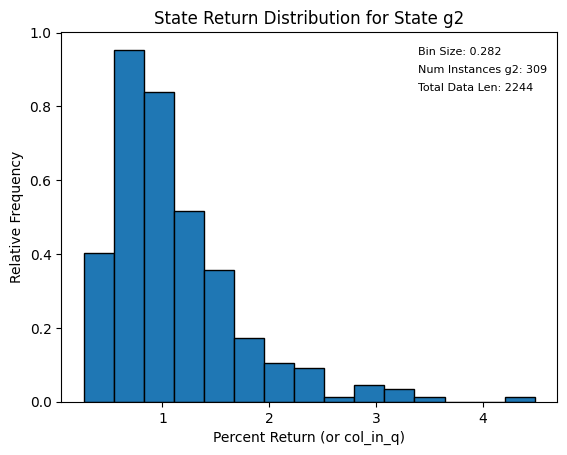

In [23]:
import matplotlib.pyplot as plt

col_in_q = 'daily_return'

def get_values_in_q(data, state, col_in_q='daily_return', percentify=True):
    return list(data[data['state'] == state][col_in_q].apply(lambda x: x * 100))

possible_states = czech_state_determiner_price.possible_states

state = list(possible_states)[0]

total_data_len = len(data)
values_in_q = get_values_in_q(data, state, col_in_q=col_in_q)
plt.title(f'State Return Distribution for State {state}')
count, bins, _ = plt.hist(values_in_q, bins=15, density=True, edgecolor='black')
n = len(values_in_q)
bin_size = round(bins[1] - bins[0], 3)
plt.xlabel('Percent Return (or col_in_q)')
plt.ylabel('Relative Frequency')
plt.text(x=0.72, y=0.94, s=f'Bin Size: {bin_size}', color='black', transform=plt.gca().transAxes, fontsize=8)
plt.text(x=0.72, y=0.89, s=f'Num Instances {state}: {n}', color='black', transform=plt.gca().transAxes, fontsize=8)
plt.text(x=0.72, y=0.84, s=f'Total Data Len: {total_data_len}', color='black', transform=plt.gca().transAxes, fontsize=8)

,Open,High,Low,Close,Adj Close,Volume,daily_return,volume_change,STD_L=20,state
Date,,,,,,,,,,
2010-02-02,109.260002,110.589996,108.879997,110.379997,84.861916,216327900,0.012103,0.151507,0.010585,g2
2010-02-03,109.879997,110.480003,109.510002,109.830002,84.439110,172730700,-0.004982,-0.201533,0.010574,d1
2010-02-04,108.980003,109.029999,106.419998,106.440002,81.832802,356715700,-0.030866,1.065155,0.012403,d3
2010-02-05,106.559998,106.879997,104.580002,106.660004,82.001930,493585800,0.002067,0.383695,0.012344,g1
2010-02-08,106.739998,107.330002,105.809998,105.889999,81.409950,224166900,-0.007219,-0.545840,0.012270,d1
